In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Regresión Logistica
 Importar librerías necesarias

In [4]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline
# Libreria de pandas
import pandas as pd

In [5]:
# Cargar dataset
df = pd.read_csv("/content/drive/MyDrive/IA/healthcare-dataset-stroke-data.csv")

# Eliminar columna ID que no aporta información
df = df.drop(columns=["id"])

# Rellenar valores nulos en bmi
df["bmi"] = df["bmi"].fillna(df["bmi"].median())

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Preprocesamiento


In [6]:
from sklearn.preprocessing import LabelEncoder

# Copia del dataset
df_encoded = df.copy()

# 1. Label encoding para stroke
le = LabelEncoder()
df_encoded["stroke"] = le.fit_transform(df_encoded["stroke"])

# 2. One-Hot Encoding para Industry y Region
df_encoded = pd.get_dummies(df_encoded, columns=["gender", "ever_married","work_type","Residence_type","smoking_status"], drop_first=True)

# Verificamos las primeras filas
df_encoded.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,True,False,True,False,True,False,False,True,True,False,False
1,61.0,0,0,202.21,28.1,1,False,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.5,1,True,False,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.4,1,False,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.0,1,False,False,True,False,False,True,False,False,False,True,False


In [7]:
df_encoded = df_encoded.astype(int)
df_encoded.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228,36,1,1,0,1,0,1,0,0,1,1,0,0
1,61,0,0,202,28,1,0,0,1,0,0,1,0,0,0,1,0
2,80,0,1,105,32,1,1,0,1,0,1,0,0,0,0,1,0
3,49,0,0,171,34,1,0,0,1,0,1,0,0,1,0,0,1
4,79,1,0,174,24,1,0,0,1,0,0,1,0,0,0,1,0


In [8]:
# Variables predictoras y target
X = df_encoded.drop("stroke", axis=1)
y = df_encoded["stroke"]

# Columnas numéricas (continuas + binarias)
num_cols = ["age", "avg_glucose_level", "bmi", "hypertension", "heart_disease"]

# Columnas categóricas (todo lo demás excepto 'id')
cat_cols = [col for col in X.columns if col not in num_cols ]


In [9]:
before = df_encoded.shape[0]

# Eliminar filas con NaN
df_clean = df_encoded.dropna()

# Número de filas después de limpiar
after = df_clean.shape[0]

# Calcular cuántos ejemplos se borraron
removed = before - after

print(f"Filas antes: {before}")
print(f"Filas después: {after}")
print(f"Filas eliminadas: {removed}")

Filas antes: 5110
Filas después: 5110
Filas eliminadas: 0


#División de datos en entrenamiento (80%) y prueba (20%)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño entrenamiento:", X_train.shape[0])
print("Tamaño prueba:", X_test.shape[0])

Tamaño entrenamiento: 4088
Tamaño prueba: 1022


In [11]:
print(X)
print(y)

      age  hypertension  heart_disease  avg_glucose_level  bmi  gender_Male  \
0      67             0              1                228   36            1   
1      61             0              0                202   28            0   
2      80             0              1                105   32            1   
3      49             0              0                171   34            0   
4      79             1              0                174   24            0   
...   ...           ...            ...                ...  ...          ...   
5105   80             1              0                 83   28            0   
5106   81             0              0                125   40            0   
5107   35             0              0                 82   30            0   
5108   51             0              0                166   25            1   
5109   44             0              0                 85   26            0   

      gender_Other  ever_married_Yes  work_type_Nev

# Normalización de los datos
→ Escalar las variables numéricas para que tengan media 0 y desviación estándar 1 (o entre 0 y 1). Esto ayuda al descenso por gradiente.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


##Agregando columnas de 1

In [13]:
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]


#Definir funciones

In [41]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la entrada a un arreglo numpy
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1 / (1 + np.exp(-z))
    return g

In [42]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [43]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

#Graficar evolución del costo y Entrenamiento del modelo

Theta final: [-1.62327501e+00  9.07962832e-01  1.78884118e-01  1.24426997e-01
  2.09122543e-01  2.41901134e-02 -4.26438072e-01 -9.33275646e-04
 -7.36639258e-01 -9.35649791e-03 -6.18864534e-01 -3.03540565e-01
 -3.47223080e-01 -4.70516729e-01 -1.88638622e-01 -5.07102310e-01
 -2.17729745e-01]
Costo final: 0.16723300419057632


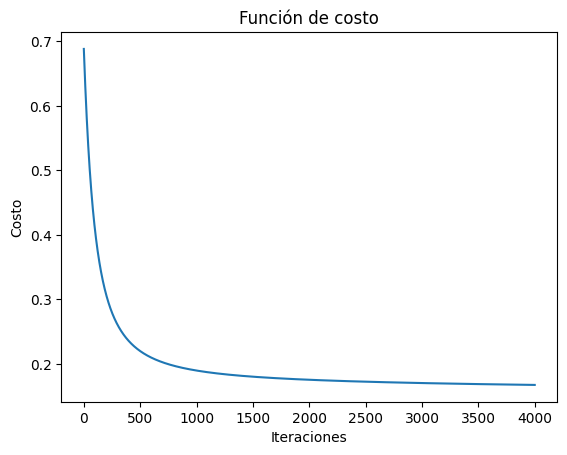

In [50]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.01
num_iters = 4000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X_train.shape[1])
theta, J_history = descensoGradiente(theta, X_train, y_train.values, alpha, num_iters)

print("Theta final:", theta)
print("Costo final:", J_history[-1])
# Grafica la convergencia del costo
pyplot.plot(range(len(J_history)), J_history)
pyplot.xlabel("Iteraciones")
pyplot.ylabel("Costo")
pyplot.title("Función de costo")
pyplot.show()


# Predicción y validación del modelo

In [60]:
def predict(X, theta):
    return (sigmoid(X @ theta) >= 0.5).astype(int)

y_pred = predict(X_test, theta)
accuracy = (y_pred == y_test).mean()
print(f"Exactitud en test: {accuracy * 100:.2f}%")


Exactitud en test: 95.21%


Conclusion de todos los pacientes del conjunto de prueba (los que el modelo no había visto), el modelo acertó correctamente en el 95.21% de los casos al clasificar si tuvieron o no un stroke(accidente cerebrovascular).